# Lab 4: Sensing Part 1
### EECS 16B: Designing Information Devices and Systems II, Spring 2023
Updated by Mia Mirkovic (2020)

Updated by Rafael Calleja (2021)

Updated by Steven Lu, Kaitlyn Chan (2021)

Updated by Steven Lu (2022)

Updated by Shrey Aeron, Mingyang Wang, and Megan Zeng (2022)

Updated by Megan Zeng (2023)


## Table of Contents

* [Part 0: Introduction](#part0)
* [Part 1: Mic Board Circuitry](#part1)
* [Part 2: *Bass*ic Filter](#part2)
* [Part 3: Checkoff](#checkoff)
* [Part 4: Midterm Lab Report Questions](#part4)


<a id='part0'></a>
# <span style="color:navy">Part 0: Introduction</span>

In the previous lab, you built S1XT33N's legs: the motor controller circuits that enable it to move around and the encoder circuits to sense how far and fast S1XT33N has moved. You also built a 5V voltage regulator circuit to power the circuits so that S1XT33N can freely roam on the ground. Our end goal is to have S1XT33N be voice-controlled, and in order to do that, we need a way for S1XT33N to listen to what you're saying.


## Lab Notes
* [Main Lab Note](https://eecs16b.org/lab/notes/lab_note4.pdf)
* [Extra Note](https://eecs16b.org/lab/notes/lab_note4_extra.pdf)

Review the lab note. The lab note provides a technical review of the concepts covered in lab as well as theoretical connections. **You should read the lab notes before your lab section.** They serve as a review and will be helpful as a reference during section.

The extra lab note is optional reading for after you've completed the lab if you are interested in learning more about the electret microphone.


## Pre-Lab

Complete the pre-lab assignment before doing the lab. Submit your answers to the Gradescope assignment "[\[Lab\] Pre-Lab 4: Sensing Part 1](https://www.gradescope.com/courses/484565/assignments/2673318)". Please make sure that you submit to the correct assignment. Pre-Lab 4 is due on **Sunday, February 26 at 11:59pm**. No late submissions will be accepted.

## Help Request Form
Use this [form](https://eecs16b.org/lab-help) to request help in your debugging / conceptual needs.

## Project Breadboard Layout
In this lab, you will be building S1XT33N's "ears," the mic board circuit that will pick up your voice and convert it into an electrical signal. These circuits correspond to the regions in the center of the breadboard labelled Mic Board, Biasing Circuit, Op-Amp, and Low-Pass Filter. **Again, we strongly recommend that you follow this layout as you build the different circuits for S1XT33N.**
<img width="700px" src="images/suggested_layout.jpg">


<a id='part1'></a>
# <span style="color:navy">Part 1: Mic Board Circuitry</span>
-----

The Mic Board is the primary component that converts your voice into an electrical signal; we will build peripheral circuitry so that the Mic Board functions properly. More information about the Mic Board can be found in the lab note.

### 1.1. Setting up the Mic Board

#### Materials
- Mic board
- Op-amp

<img style="width:250px" src="images/mic_annotated.png">

#### Tasks: 

1. Plug in an Op Amp into the 8-pin socket on your mic board. Make sure you **plug it in the right way** by matching the notch on the op amp chip with the notch in the op amp socket on the mic board! 

2. Plug your micboard _DIRECTLY_ into your project breadboard. **No jumper wires**

3. Connect the mic board's `VDD` pin to 5V from the positive rails, powered by the 5V regulator.

4. Connect either of the mic board's two `VSS` pins to the ground rail (you only need to connect one of them).

The recommended layout of your project breadboard is reproduced below for your convenience. We suggest you put your mic board near the center of your project breadboard, as you will be building more circuits for the remainder of the lab.
<img style="width:750px" src="images/suggested_layout.jpg">

### 1.2. Build the Biasing Circuit

The purpose of the biasing circuit is to produce a constant $2.5V$ output at the `HALF_RAIL`, which is used by the micboard. For more details on the purpose of the $2.5V$, refer to the lab note.

#### Materials
- Mic board
- Additional Op-Amp (not the one on the micboard)
- 2x $10 k\Omega$ resistors | (code: brown, black, orange, gold)
- $100 k\Omega$ resistor | (code: brown, black, yellow, gold)
- Power supply
- Screwdriver

|Biasing Circuit:|Op-Amp Pinout:|
|:-----:|:---------------:|
|<img style="width:500px" src="images/sp23_biasing.png">|<img style="width:500px" src="images/op_amp_pinout.png">| 


#### Tasks:

1. Build the biasing circuit near your mic board on the project breadboard. Use the suggested layout from above as a reference for where we recommend you build the circuit.

2. Connect any nodes requiring 5V to the positive rails on your project breadboard.

3. Connect the node labeled `HALF_RAIL` to an empty row on your project breadboard.

4. Connect `OS1` on your mic board to the `HALF_RAIL` using a $100k\Omega$ resistor.

5. Connect `OS2` on your mic board to the `HALF_RAIL` using a wire.

6. Power your 5V regulator with 9V using the +25V channel on your DC power supply. Make sure to set the current limit to 0.1A!

#### Sanity check:
- Pause here and make sure that all of your nodes on the mic board are connected to the correct voltages:
    - VDD = 5V
    - VSS = 0V
    - OS1 = ~2.5V
    - OS2 = ~2.5V
- If any node's voltage is not what you expect it to be, go back and debug your circuits!

## Questions

<span style="color:#075a04"> **1.2.1 What is the purpose of OS1 and OS2?** </span>

_Hint: Read the lab note if you're not sure!_

OS1 DC Offset: Because we need our signal to be centered in our target range (0 - 5 V), we will need to set the DC offset to the midpoint of this range: 2.5 V. This can easily be accomplished with a voltage divider of two equal resistors from
the 5 V rail to ground.

OS2: Level Shift
When we introduce the DC Offset, we will encounter a problem when the signal passes through the non-inverting
amplifier: that DC offset will be amplified along with the rest of the signal! This is because the amplifier will
amplify the signal as referenced from ground. We connect OS2 to 2.5V when building the mic board circuits - this is how we tell the non-inverting amplifier to use 2.5V as a reference.

### 1.3. Tune Your Mic Board

#### Materials:
- Phone speaker or headphones

#### Tasks:
1. Connect your oscilloscope probe to $V_{out}$ on your mic board.

2. Add a **peak-to-peak** measurement for the oscilloscope channel you're using to probe your mic board output. Additionally, we recommend you set the horizontal time scale to about 5-10 ms.

3.  **Play a pure tone using a [tone generator](https://www.szynalski.com/tone-generator/) in the range (1500 - 2000 Hz)** on your phone at a reasonable volume (leaning towards the soft side). Do NOT use a Youtube video!
    - If the tone generator website is not working for you, you can download a tone generator app onto your phone instead.

4.  Make sure to point the speaker directly at the mic and hold it a few inches away from the mic. The distance between your speaker and the mic significantly affects the tuning process, so **try to keep the distance between your phone and speaker consistent**.

5. Turn the potentiometer on the mic board **(CW: decrease amplitude | CCW: increase amplitude)** using a screwdriver until you see a sine wave with a **peak-to-peak of around 1.5V to 2V** on the oscilloscope. **The sine wave should be centered at around 2.5V.**
    - **The potentiometer is a multiturn potentiometer, so you will have to turn it A LOT before you will notice any changes.** However, note that the tuning screw is very sensitive near the target voltage range.

6. Verify that the frequency of the measured sine wave matches the tone from your phone using your oscilloscope by adding a **frequency** measurement.

#### Important Notes:
- With oscillating signals like this, there is an important concept called "railing." We define railing, with regards to this mic board, as non-linear behavior at the boundaries of the output range that results from the op-amp on the mic board being limited by its VDD and VSS, rendering it unable to output the entire output range. If you see flat edges/lines on either the top or bottom of the waveform instead of the smooth peaks and troughs of the sine wave, which happens if you have $V_{pp} \geq 5V$, your mic board is railing, and you need to reduce the amplitude of the mic board output.

|Normal/Correct Behavior:|Railing Behavior (AVOID THIS):|
|:-----------:|:-----------:|
|<img style="width:500px" src="images/not_railing.jpg">|<img style="width:500px" src="images/railing.jpg">|

- As a sanity check: Tap on the mic and ensure that it rails. However, **it should not be railing while you play the tone.**
- **DO NOT use autoscale on the oscilloscope!** It will not work well with our mic board signal because the signal varies very rapidly. Using autoscale often sets the timescale to a few nanoseconds, which is too small of a timescale to see anything of importance or value for us.

<span style="color:#ba190f">**Congratulations! You have successfully tuned your mic board!**</span>

### 1.4. Measure the Frequency Response of the Speaker-Microphone System

Now that we've built and tuned our mic board circuits, we now need to characterize the system and determine its frequency response: its performance at various different frequencies of sound.

Usually this is performed with an automated linear sweep of every value within the range of frequencies that your system will be tasked with handling. As this is impractical to do manually, you will be testing and measuring values for a few key frequencies spread out across the entire range. 

Note that we are finding the frequency response of our joint speaker-microphone system, not just that of our microphone. You can think of our system as your speaker (which is playing the pure tones) in series with your microphone (which is receiving the pure tones) and outputting some voltage corresponding to those pure tones. We are measuring this cascaded system's reactions to certain frequency inputs.

Use the oscilloscope to measure the peak-to-peak voltage of the mic board output ($V_{out}$) at each frequency in the dictionary `freq_Vpp` below. Record these values into this dictionary and run the code to plot the frequency response of your joint system.

As a reminder, **keeping your phone/speaker at a fixed distance and volume from your mic board for all frequencies**. We recommend that you choose your speaker's volume in accordance with one of the middle frequencies and its corresponding oscilloscope reading. This is because most speakers are not expected to be audible for low frequencies. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp
from pylab import * 
%matplotlib inline

Vpp =  [0.5, 0.5, 1.5, 2.2, 4.2, 4.8, 5.0, 5.3, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5]


Text(0, 0.5, 'Gain (Volts/Volts)')

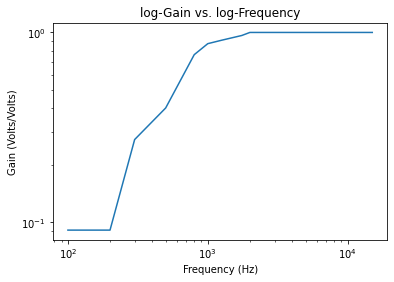

In [8]:
# Record the amplitude of the output sinusoid at each given frequency. 
# Fill in your values here and replace the "None"s with your measured voltage values
freq_Vpp = {
    100: 0.5,
    200: 0.5, 
    300: 1.5, 
    500: 2.2, 
    800: 4.2, 
    1000: 4.8, 
    1250: 5.0, 
    1750: 5.3, 
    2000: 5.5,  
    3000: 5.5, 
    4000: 5.5, 
    5000: 5.5, 
    6000: 5.5, 
    7000: 5.5, 
    8000: 5.5,
    10000: 5.5,
    15000: 5.5
}
freq = sorted(list(freq_Vpp.keys()))
assert len(freq) == 17, "Ensure that you didn't remove any of the frequences :pandacop:"

Vpp = [freq_Vpp[f] for f in freq] 
print("Vpp = ", Vpp)

# We do not have a measurable input signal Vin, so we normalize the maximum of the frequency response to 1.
gain = np.array(Vpp)/max(Vpp)

plt.loglog(freq, gain)
plt.title('log-Gain vs. log-Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (Volts/Volts)')


### Save your `freq_Vpp` dictionary somewhere (we recommend pasting it into a random Google Doc)! You will need it in the next lab and the lab report.

<span style="color:#075a04"> **1.4.1. What do you notice about the shape of this function? Which frequencies result in large output?**</span>

It caps off around 5.5V bc of our range of VSS and VDD

<span style="color:#075a04"> **1.4.2. What would be the shape of an ideal speaker-microphone system's frequency response?**</span>

Smooth sine fucntion, no railing

<span style="color:#075a04"> **1.4.3. What does the plot tell you about the loudness of your speaker at certain frequencies? Does this reflect your experience listening to music?**</span>

Hint: low frequencies correspond to the bass in a song. Try playing something [bass-heavy :)](https://youtu.be/rCuBBaLtXQQ)

The higher the frequncy the higher the amplitude (more bass), and when we listen to music such as 432hz the bass seems much softer than a regular rap song for say.

<span style="color:#075a04">**1.4.4. Let's say you wanted to flatten out the frequency response of your system such that the gain is around the same across all frequencies. Suggest a way to accomplish this with the circuit elements you learned about in lecture.**</span>

Set the power supply limit

<a id='part2'></a>
# <span style="color:navy">Part 2: *Bass*ic Filter</span>

-----
In this part, you will build a low-pass filter to isolate the frequencies below the provided cutoff frequency. This filter will eventually be used to better sample voice commands in later phases of the project.

### Materials
- Capacitors
- Resistors
- LED
- Function generator
- Oscilloscope

## Tasks

### 2.1. Design and Build the Low-Pass Filter

1. Recall the circuit diagram and cutoff frequency equation $f_c$ for a first-order low pass RC filter. Feel free to refer to lecture notes or draw it out if it helps.

2. Choose values for $R$ and $C$ such that your cutoff frequency $f_c$ is roughly 2500 Hz. Don't worry about getting the exact cutoff frequency: being within a few hundred Hz is fine.
    - We chose 2500 Hz because most of the human vocal range falls below 2500 Hz.
    
3. Record your values for $R$ and $C$ in the code below. Write code to calculate $f_c$ given your values using the $R$ and $C$ variables.

4. Build the low-pass filter on your breadboard. Don't connect the micboard output to your low pass filter yet!
    - Look in the lab note for the resistor color code chart and capacitor code chart.
    - Remember, you can combine resistors in series/parallel with each other!

#### Notes/Tips:
- Since we have far more resistor values than we have capacitor values, start by choosing an easy capacitor value, like $1\mu F$, $0.1\mu F$, etc. Pick one that lets you choose resistors of at least 1 $k\Omega$ (otherwise, the current draw would make the readings unstable).

In [ ]:
### YOUR CODE HERE
R = 6.366 Kilo Ohms
C = 10 nF = 10^-8 F (Filter)
f_c = 2500

print("Low pass filter")
print("===============")
print("Resistor: {} ohms".format(R))
print("Capacitor: {} farads".format(C))
print("Cutoff frequency: {} Hz".format(f_c))

### 2.2. Test the Low-Pass Filter

With the low pass filter built, we'll check that the cutoff frequency is as expected. To test it in isolation from other components, we'll use the function generator to generate a reliable input. 

1. Set your function generator to output a sinusoid with a 2.5V offset, 1V peak-to-peak voltage, and the frequency as the cutoff frequency of your low pass filter. Remember to set the output load to High-Z.
2. Connect the function generator to the input of your low pass filter. **Make sure your mic board output is not connected to your filter**. 
3. Probe the output of your low pass with your oscilloscope. Ensure the gain/attentuation at the cutoff frequency is what you expect by comparing the peak-to-peak values of your input and output sinusoids. 
    - At the filter's cutoff frequency, the output $V_{pp}$ should be $\frac{1}{\sqrt 2} \cdot V_{pp}$. 
4. Additionally try outputting a very low frequency and very high frequency, and see if the output changes as expected.

### 2.3. Plot the Frequency Response of the Low-Pass-Filtered Mic Board

Now that we've verified the low-pass filter's functionality, it's time to connect it to our mic board. 
1. Disconnect your function generator from your circuit. Connect the **output of the mic board** to the input of your filter.
2. Probe the output of your filter with your oscilloscope.

Once you have done that, fill in the cutoff frequency of your low pass filter in the cell below and run it to plot the ideal frequency response of an RC low pass filter. 

In [ ]:
### TODO: Enter your low cutoff frequency below inside the float() call. 
low_cutoff = 2500 #TODO

lp_p2p_expected = 1/(np.sqrt(1+((np.array(freq)/(low_cutoff))**2)))


plt.plot(freq, lp_p2p_expected)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("Frequency vs Gain (Low Pass)")
plt.show()

plt.loglog(freq, lp_p2p_expected)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("log-Frequency vs log-Gain (Low Pass)")
plt.show()

Next, we will measure the frequency response of the low-pass-filtered mic board. For the given frequencies below in `lp_freq_Vpp`,  measure and record the output peak-to-peak voltage values.

In [ ]:
# Record the amplitude of the output sinusoid at each given frequency. 
# Fill in your values here and replace the "None"s with your measured voltage values
lp_freq_Vpp = {
    200: 700mv,
    400: 1.2V, 
    600: 2.0V, 
    1000: 3.7V, 
    2000: 5.0,
    5000: 3.3V
}
lp_freqs = sorted(list(lp_freq_Vpp.keys()))
lp_p2p_observed = [lp_freq_Vpp[f] for f in lp_freqs]

lp_gain_observed = np.array(lp_p2p_observed)/np.max(lp_p2p_observed)

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("Frequency vs Gain (Low Pass)")
plt.plot(freq, lp_p2p_expected)
plt.scatter(lp_freqs, lp_gain_observed)
plt.show()

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("log-Frequency vs log-Gain (Low Pass)")
plt.loglog(freq, lp_p2p_expected)
plt.scatter(lp_freqs, lp_gain_observed)
plt.show()

<!-- <span style="color:#075a04"> **Sanity check: Does the frequency response of your low-pass filtered mic board match the frequency response of an ideal low-pass RC filter? Why or why not?** </span> -->

<span style="color:#075a04">  **Note: The frequency response of your low-pass filtered mic board won't match the frequency response of the ideal low-pass RC filter. Think about why this might be the case.** </span>


Now, we will multiply the ideal low-pass filter frequency response (lp_p2p_expected) with our observed speaker-mic board frequency response (the variable called gain). Run the script below to plot the resulting frequency response.

In [ ]:
response_lp_micboard = np.multiply(lp_p2p_expected, gain)

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("Frequency vs Gain (Low pass filtered Micboard)")
plt.plot(freq, response_lp_micboard)
plt.scatter(lp_freqs,lp_gain_observed)
plt.show()

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("log-Frequency vs log-Gain (Low pass filtered Micboard)")
plt.loglog(freq, response_lp_micboard)
plt.scatter(lp_freqs,lp_gain_observed)
plt.show()

<span style="color:#075a04"> **Sanity check: Does the frequency response of your low-pass filtered mic board match the frequency response of the low-pass filter multiplied with our speaker-mic board frequency response? Why or why not?** </span>

### 2.4. Amplify the Low-Pass Signal
After filtering, the signal may not be strong enough to be measured by the Arduino. Therefore, we may need to amplify the signal.

1. Build a non-inverting amplifier as described in Appendix A of [Lab Note 1](https://eecs16b.org/lab/notes/lab_note1.pdf), where $v_{in}$, $V_{REF}$, and $v_{out}$ in the note correspond to `Vin`, `Vref`, and `Vout` in the diagram below. Make sure to use resistor values of $\geq 1k \Omega$. Choose a gain such that the largest peak-to-peak voltage in `lp_freq_Vpp` is amplified to around 2-2.5V.
    - If your $V_{pp}$ is already high enough (which will likely be the case), you won't need any gain, so you can simply build a buffer.
    - Since all of the signals are centered at half rail rather than 0V, we will treat 2.5V as our virtual ground. Note that `Vref` is connected to 2.5V rather than GND to preserve our 2.5V offset.
2. Connect the output of your filter to the input of your amplifier.
3. Connect the output of your amplifier to a 10 $\Omega$ resistor and LED in series. This will help you visualize the output of your amplified Low Pass Signal.
    - Note that the cathode of the LED is connected to the half rail, not ground!
4. Probe the output of your amplifier to ensure your signal responds to noise and is not railing. 
    - Is the LED's behavior what you would expect? It's ok if the LED doesn't work perfectly, it tends to be a bit finicky.


<img style="width:750px" src="images/sp23_low_pass.png">

<a id='checkoff'></a>
# <span style="color:#ba190f">CHECKOFF</span>
-----
### Checkoff Form (https://eecs16b.org/lab-checkoff)

- **Have all questions and plots completed in this notebook.**

- **Show your TA your working circuits:**
    - Show the output of your tuned mic board on the oscilloscope.
    - Show your frequency response plot of the speaker-microphone system.

- **Be prepared to answer conceptual questions about the lab.**
    
- <span style="color:red;font-weight:bold">DO NOT DISMANTLE ANY CIRCUITS FROM YOUR BREADBOARD! You will need them for the rest of the project!</span>

- **Remember what each part of your circuit is for. You will need to write summaries of each lab for the lab reports!**

- **Back up this document (e.g. to Google Drive or Github).**

- If you're interested in learning more about the components we used in this lab, read the [extra reading lab note](https://eecs16b.org/lab/notes/lab_note4_extra.pdf).

<a id='part4'></a>
# <span style="color:navy">Part 4: Midterm Lab Report Questions</span>
-----

The midterm lab report tests your understanding of EECS 16B Labs 1-5, with an emphasis on conceptual and
analytical understanding. It also allows you to look at these labs from a bigger picture and reflect on your design
process and choices. We will release the lab report questions relevant to each lab at the bottom of the corresponding Jupyter notebook. All of the midterm lab report questions will be compiled together [here](https://edstem.org/us/courses/34924/discussion/2428391) and updated as new questions are released. The entire midterm lab report will be due on **Friday, 03/10**.

## Questions

**Summary**

- Give a summary in your own words of what you did in this lab.

The following questions will analyze the combined mic board and biasing circuit, which is shown below. The microphone  can be modeled as a signal-dependent current source, $I_{MIC} = k \sin(\omega t) + i_{drift}$, where $I_{MIC}$ is the current flowing from VDD to VSS, $k$ is the force to current conversion ratio, $\omega$ is the signal's frequency (in \si{\radian\per\second}), and $i_{drift}$ is a constant current offset (in A). Note that $R_{51}$ and $R_{52}$ are resistors of the potentiometer ($R_5 = R_{51} + R_{52}$).

When asked to give an answer in terms of the circuit components, please give your answer only in terms of $V_{DD}$, $R_1$, $R_3$, $R_4$, $R_{51}$, $R_{52}$, $k$, $\omega$, $t$, $i_{drift}$, and/or standard mathematical constants and functions. Throughout this problem, please show all of your work.

<img style="width:500px" src="images/mic_and_biasing.png">

**1. What is the voltage $V_1$ in terms of the circuit components?**

**2. What is the voltage $V_2$ in terms of $V_1$? What is the voltage $V_2$ in terms of the circuit components? Assume that $R_2=0$.**

**3. What is the voltage $V_4$ in terms of the circuit components?**

**4. What is the voltage $V_3$ in terms of $V_2$ and $V_4$? What is the voltage $V_3$ in terms of the circuit components? Assume that $C_1$ and $R_6$ are large enough such that only AC signals pass through $C_1$.**

**5. What is $V_{OUT}$ in terms of $V_3$ and $V_4$? What is $V_{OUT}$ in terms of the circuit components?**

**6. Did your mic board performance seem to deviate from your model? Why/why not? Please include a graph of your micboard transfer function with your answer.**